In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 

In [14]:
plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['font.size']=14
plt.rcParams['font.weight']='normal'
plt.style.use('seaborn-whitegrid')

In [1]:
from google.colab import files
files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


{'FuelConsumptionCo2.csv': b'MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS\r2014,ACURA,ILX,COMPACT,2,4,AS5,Z,9.9,6.7,8.5,33,196\r2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221\r2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9,48,136\r2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255\r2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244\r2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10,28,230\r2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232\r2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9,11.1,25,255\r2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267\r2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212\r2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225\r2014,ACURA,TSX,COMPACT,3.5,6,AS5,Z,12.1,8.3,10.4,27,239\r2014,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18,12.6,15.6,18,359\r2014,ASTON MARTIN,RAPIDE,SUB

Data Prepare

In [16]:
df=pd.read_csv('FuelConsumptionCo2.csv')

In [17]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [20]:
col_names=['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION']
for col in col_names:
  print(df[col].value_counts())

2014    1067
Name: MODELYEAR, dtype: int64
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64
F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                 

In [21]:
df.shape

(1067, 13)

In [22]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [23]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Slicing Data

In [25]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [26]:
missing_data = df.isnull()
for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print("")

ENGINESIZE
False    1067
Name: ENGINESIZE, dtype: int64

CYLINDERS
False    1067
Name: CYLINDERS, dtype: int64

FUELCONSUMPTION_CITY
False    1067
Name: FUELCONSUMPTION_CITY, dtype: int64

FUELCONSUMPTION_HWY
False    1067
Name: FUELCONSUMPTION_HWY, dtype: int64

FUELCONSUMPTION_COMB
False    1067
Name: FUELCONSUMPTION_COMB, dtype: int64

FUELCONSUMPTION_COMB_MPG
False    1067
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64

CO2EMISSIONS
False    1067
Name: CO2EMISSIONS, dtype: int64



Data Exploration

Descriptive Statistical Analysis

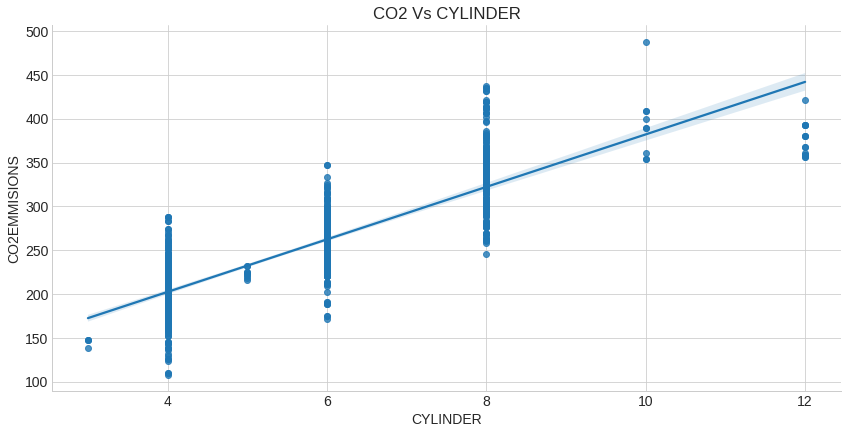

In [27]:
sns.lmplot(x='CYLINDERS',y='CO2EMISSIONS',data=df,aspect=2,height=6)
plt.xlabel('CYLINDER')
plt.ylabel('CO2EMMISIONS')
plt.title('CO2 Vs CYLINDER');

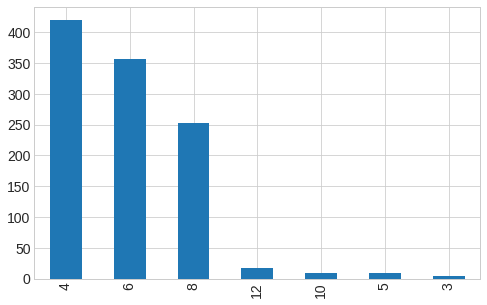

In [28]:
df['CYLINDERS'].value_counts().plot(kind='bar')

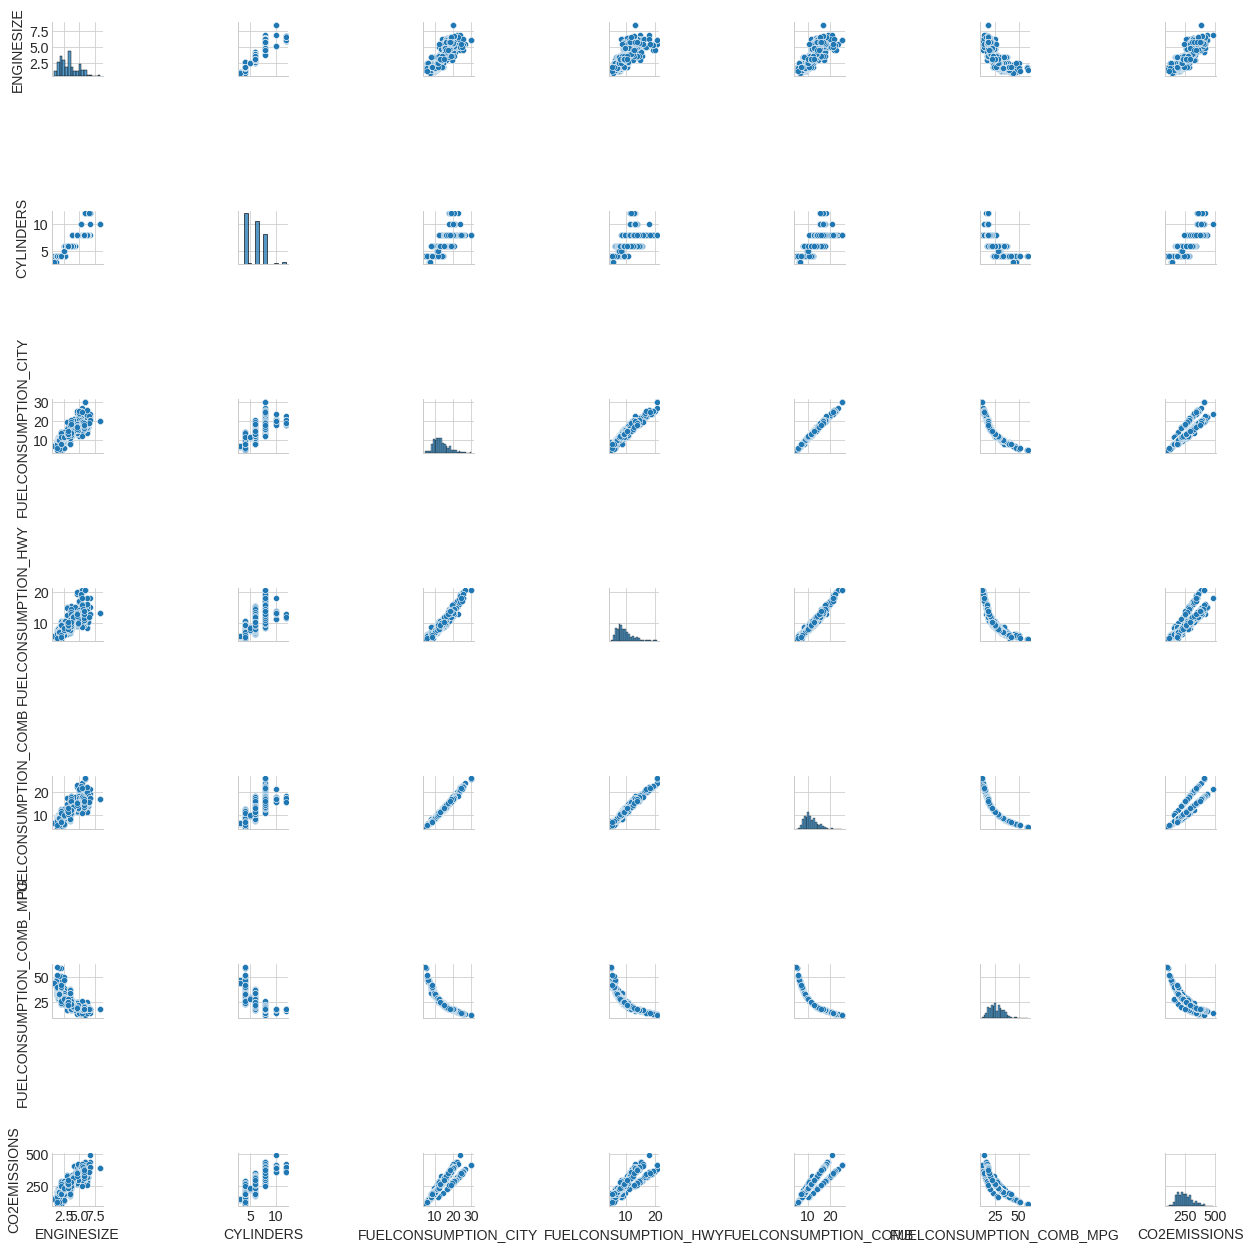

In [29]:
sns.pairplot(df)

In [30]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


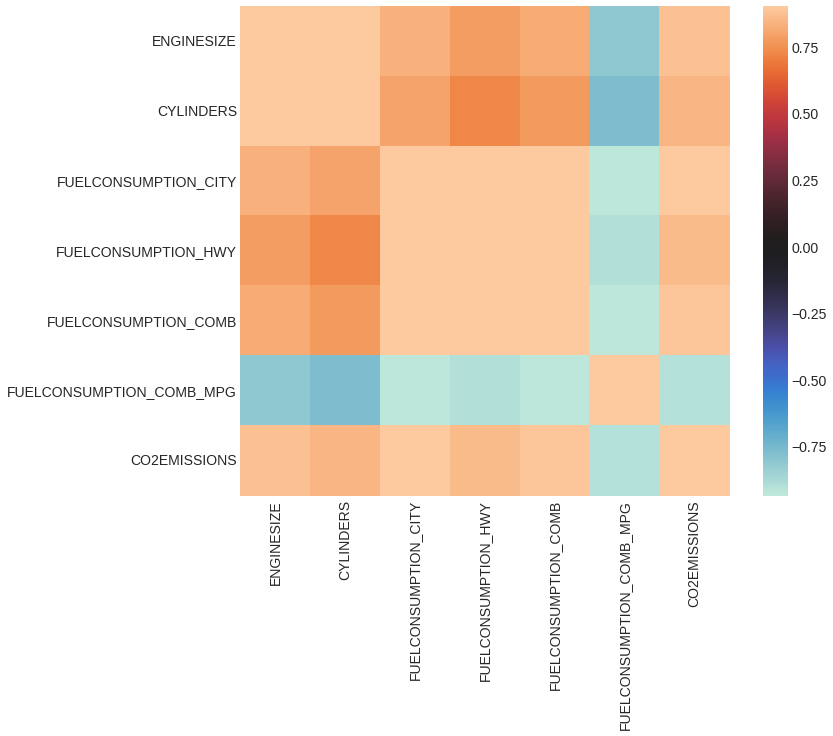

In [31]:
corr_train = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_train, vmax=0.9, square=True, center = 0)

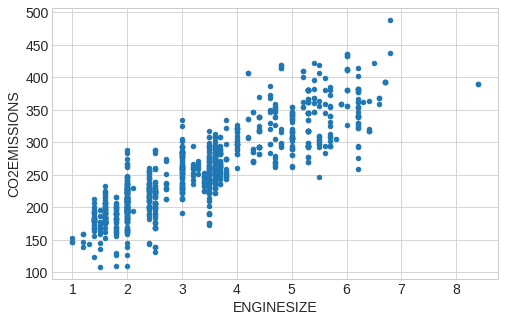

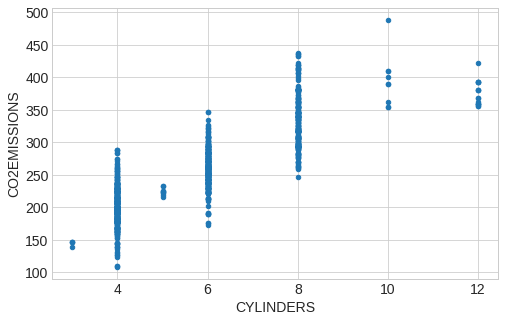

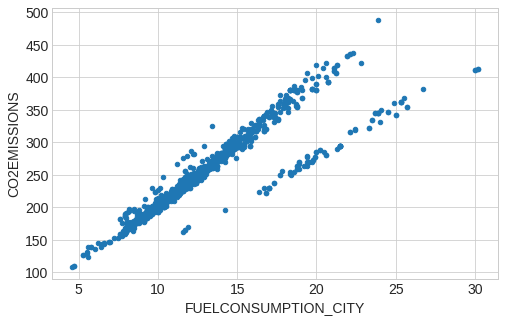

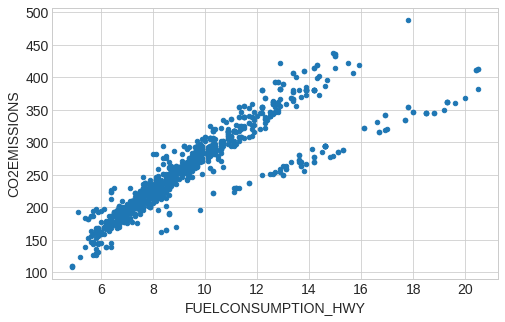

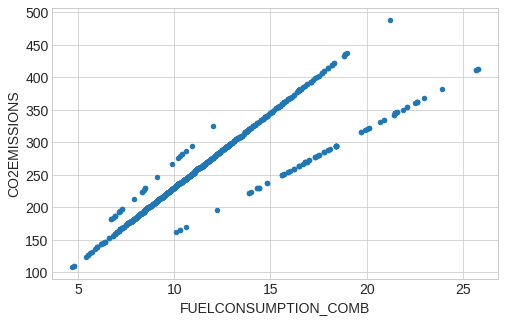

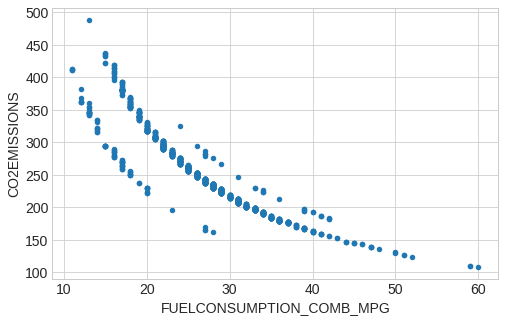

In [32]:
df.plot(kind='scatter', x='ENGINESIZE', y='CO2EMISSIONS')
df.plot(kind='scatter', x='CYLINDERS', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS')
plt.show()

In [33]:
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


Multiple Linear Regression Model

In [34]:
#start modeling
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

#split the data
X = df.iloc[:,0:5]
y = df['CO2EMISSIONS']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

#define the model
reg = linear_model.LinearRegression()
reg.fit(train_X,train_y)

LinearRegression()

In [35]:
#co-efficient
print(reg.coef_)
#imtercept
print(reg.intercept_)

[11.67432508  6.33698637 -6.04505337 -7.96197085 23.29812902]
66.7947429009831


Evaluation

In [36]:
#prediction
pred = reg.predict(test_X)

#calculate the accuracy score and r2 score
print("Mean absolute error: %.2f" % np.mean(np.absolute(pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(pred , test_y) )


Mean absolute error: 16.70
Residual sum of squares (MSE): 551.63
R2-score: 0.85


Predictor CO2

Model Building

In [37]:
X=df.drop(columns='CO2EMISSIONS',axis=1)
Y=df['CO2EMISSIONS']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(1067, 6) (746, 6) (321, 6)


In [40]:
regressor=LinearRegression()

In [41]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [42]:
trainingdataprediction=regressor.predict(X_train)

In [43]:
r2=metrics.r2_score(Y_train,trainingdataprediction)
print("R square : ",r2)

R square :  0.8871025469400587


In [44]:
test_predict=regressor.predict(X_test)

In [45]:
r2_test=metrics.r2_score(Y_test,test_predict)
print("R2 value : ",r2_test)

R2 value :  0.8931034374830095


In [46]:
input_data = (3.5,6,6.0,7.0,8.5,33)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('CO2 EMMISION IS ', prediction[0])

[303.20803592]
CO2 EMMISION IS  303.20803591925096


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
